# Лабораторная работа №2 — Моделирование и анализ линейных комбинаций дискретных сигналов
  Выполнили студенты гр. 2383 Борисов Иван Павлович и Иваницкий Илья Александрович.
**Вариант:** **9**

**Цель работы:** изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.


## Краткое изложение теоретических понятий 

### Дискретный прямоугольный импульс $s_1(k)$

Моделируется как кусочно-постоянная последовательность:

$$
s_1(k) = 
\begin{cases}
U, & k \in [n_0,\ n_0 + n_{\text{imp}} - 1] \\
0, & \text{иначе}
\end{cases}
$$

Чаще удобно строить его через дискретный единичный скачок $\sigma_d(k)$:

$$
s_1(k) = U \cdot \left[\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{\text{imp}}))\right]
$$

---

### Линейная комбинация гармонических сигналов $s_2(k)$

Задаётся суммой взвешенных синусоид:

$$
s_2(k) = a_1 \cdot B_1 \cdot \sin(\omega_1 \cdot k) + a_2 \cdot B_2 \cdot \sin(\omega_2 \cdot k) + a_3 \cdot B_3 \cdot \sin(\omega_3 \cdot k)
$$

Моделирование — вычисление каждой составляющей и суммирование поэлементно.

---

### Среднее значение последовательности $x(k)$

Среднее значение (mean) — арифметическое среднее по дискретному времени:

$$
\text{mean} = \frac{1}{N} \sum_{k=0}^{N-1} x(k)
$$

где $N$ — общее количество отсчётов.

---

### Энергия дискретной последовательности $x(k)$

$$
E = \sum_{k=0}^{N-1} |x(k)|^2
$$

---

### Средняя мощность

$$
P = \frac{E}{L} = \frac{1}{L} \sum_{k=0}^{L-1} |x(k)|^2
$$

где $L$ — число отсчётов.

---

### Гармонический сигнал с экспоненциальной огибающей $s_3(k)$

$$
s_3(k) = C \cdot \cos(\omega_0 \cdot k) \cdot |a|^k
$$

---

### Периодическая последовательность прямоугольных импульсов

Строится повторением одного прямоугольного импульса с заданным периодом $T$.

Для длительности $n_{\text{imp}}$ и периода $T = 2 \cdot n_{\text{imp}}$ — в каждом периоде импульс длится $n_{\text{imp}}$, а затем следует пауза той же длины:

$$
s(k) = 
\begin{cases}
U, & (k \mod T) \in [0,\ n_{\text{imp}} - 1] \\
0, & \text{иначе}
\end{cases}
$$

## Код и моделирование.

## Исходные параметры

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Nb = 9  # номер бригады

# Длина последовательности
N = 30 + Nb % 5

a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))   # основание экспоненты для s3(k)
C = 1 + Nb % 5                              # амплитуда гармонического сигнала s3(k)
w0 = np.pi / (6 + Nb % 5)                   # частота гармонического сигнала s3(k)

U = Nb % 20 + 1                             # амплитуда импульса s1(k)
n0 = 3 + Nb % 5                              # начальный момент импульса
n_imp = 5 + Nb % 5                            # длительность импульса

# Параметры гармонических сигналов для линейной комбинации s2(k)
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5

w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)

a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5


## 1. Моделирование дискретного прямоугольного импульса s₁(k)

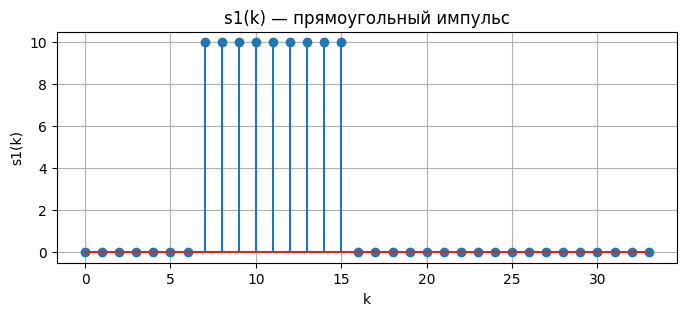

In [3]:
# Используем дискретный единичный скачок для моделирования импульса
n = np.arange(N)
s1 = U * (np.heaviside(n - n0, 1) - np.heaviside(n - (n0 + n_imp), 1))

plt.figure(figsize=(8,3))
plt.stem(n, s1, )
plt.title('s1(k) — прямоугольный импульс')
plt.xlabel('k'); plt.ylabel('s1(k)')
plt.grid(True)
plt.show()


Моделирование выполняется через дискретный единичный скачок σ_d(k) следующим образом:
1. Создаётся задержанный скачок σ_d(k - n₀), который равен 1 при k ≥ n₀
2. Создаётся второй задержанный скачок σ_d(k - (n₀ + n_imp)), который равен 1 при k ≥ n₀ + n_imp
3. Вычитанием второго скачка из первого получаем прямоугольный импульс: σ_d(k - n₀) - σ_d(k - (n₀ + n_imp)) = 1 при k ∈ [n₀, n₀ + n_imp - 1]
4. Умножением на амплитуду U получаем итоговый сигнал: s₁(k) = U·[σ_d(k - n₀) - σ_d(k - (n₀ + n_imp))]

**Аналитически:**
$$
s_1(k) = U \cdot \left[\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{\text{imp}}))\right]
$$


## 2. Линейная комбинация дискретных гармонических сигналов s₂(k)

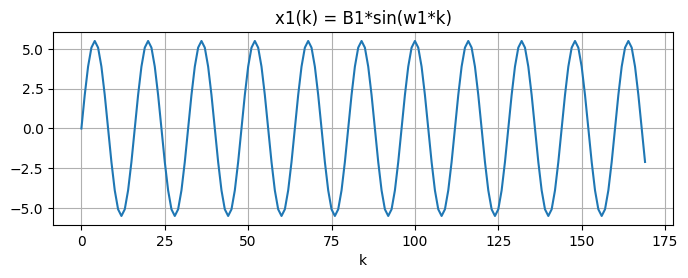

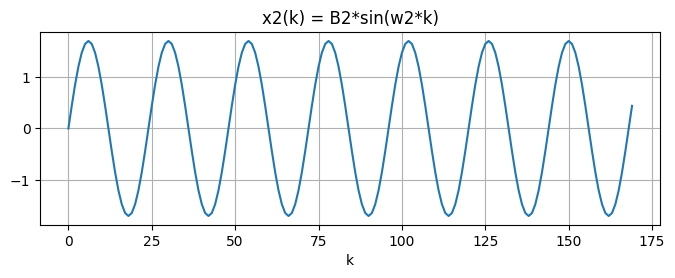

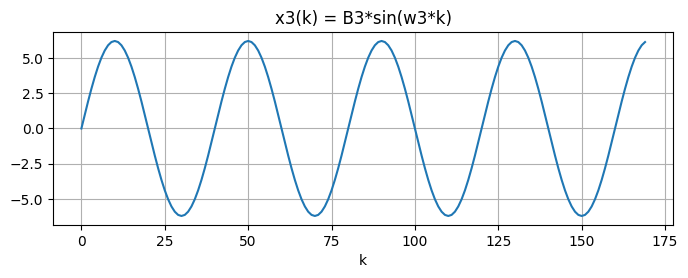

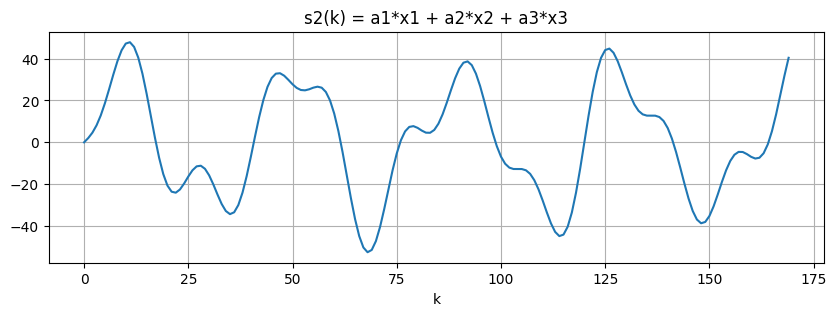

In [4]:
# Генерируем три гармонических сигнала x1(k), x2(k), x3(k)
L = 5 * N  # интервал времени: 5*N
k = np.arange(L)

x1 = B1 * np.sin(w1 * k)  # x1(k) = B1 * sin(w1*k)
x2 = B2 * np.sin(w2 * k)  # x2(k) = B2 * sin(w2*k)
x3 = B3 * np.sin(w3 * k)  # x3(k) = B3 * sin(w3*k)

# Формируем линейную комбинацию
s2 = a1 * x1 + a2 * x2 + a3 * x3
# Математически: s2(k) = a1*x1(k) + a2*x2(k) + a3*x3(k)

# Графики составляющих сигналов
plt.figure(figsize=(8,2.5))
plt.plot(k, x1)
plt.title('x1(k) = B1*sin(w1*k)')
plt.xlabel('k'); plt.grid(True)
plt.show()

plt.figure(figsize=(8,2.5))
plt.plot(k, x2)
plt.title('x2(k) = B2*sin(w2*k)')
plt.xlabel('k'); plt.grid(True)
plt.show()

plt.figure(figsize=(8,2.5))
plt.plot(k, x3)
plt.title('x3(k) = B3*sin(w3*k)')
plt.xlabel('k'); plt.grid(True)
plt.show()

# График линейной комбинации
plt.figure(figsize=(10,3))
plt.plot(k, s2)
plt.title('s2(k) = a1*x1 + a2*x2 + a3*x3')
plt.xlabel('k'); plt.grid(True)
plt.show()

**Операции при моделировании линейной комбинации сигналов s₂(k):**
1. Создаются три дискретные гармонические последовательности:
   - x₁(k) = B₁·sin(ω₁·k)
   - x₂(k) = B₂·sin(ω₂·k) 
   - x₃(k) = B₃·sin(ω₃·k)
2. Каждая последовательность умножается на свой весовой коэффициент aᵢ
3. Выполняется поэлементное суммирование: s₂(k) = a₁·x₁(k) + a₂·x₂(k) + a₃·x₃(k)
4. Все операции выполняются для каждого значения k на интервале [0, 5N-1]

**Определение характеристик последовательности s₂(k):**

**Среднее значение (mean_s2):**
$$
\text{mean\_s2} = \frac{1}{5N} \sum_{k=0}^{5N-1} s_2(k)
$$
Это арифметическое среднее всех отсчётов последовательности s₂(k) на интервале [0, 5N-1].

**Энергия (E):**
$$
E = \sum_{k=0}^{5N-1} |s_2(k)|^2 = \sum_{k=0}^{5N-1} [s_2(k)]^2
$$
Энергия вычисляется как сумма квадратов всех отсчётов последовательности (для вещественного сигнала).

**Средняя мощность (P):**
$$
P = \frac{E}{5N} = \frac{1}{5N} \sum_{k=0}^{5N-1} [s_2(k)]^2
$$
Средняя мощность равна энергии, делённой на длину последовательности (5N отсчётов).

## 3. Дискретный сигнал s₃(k) с экспоненциальной огибающей

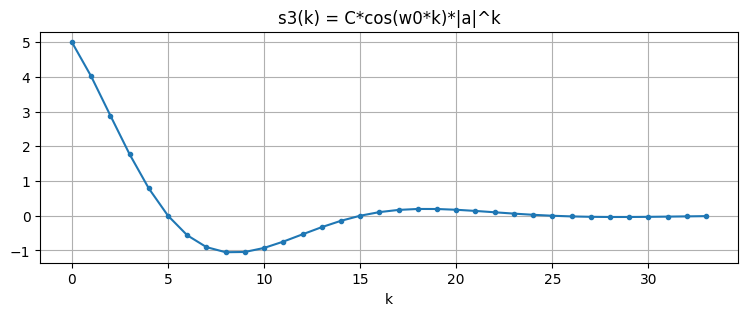

In [5]:
# Вычисление характеристик сигнала s2(k)
mean_s2 = np.mean(s2)        # среднее значение
E = np.sum(np.abs(s2)**2)    # энергия последовательности
P = E / L                     # средняя мощность

k = np.arange(N)
s3 = C * np.cos(w0 * k) * (abs(a) ** k)
# s3(k) = C*cos(w0*k)*|a|^k
# cos(w0*k) — гармонический сигнал, |a|^k — экспоненциальная огибающая

plt.figure(figsize=(9,3))
plt.plot(k, s3, marker='o', markersize=3)
plt.title('s3(k) = C*cos(w0*k)*|a|^k')
plt.xlabel('k'); plt.grid(True)
plt.show()

**Аналитическая формула:**
$$
s_3(k) = C \cdot \cos(\omega_0 \cdot k) \cdot |a|^k
$$

**График:** На интервале n ∈ [0, N-1] будет наблюдаться гармонический сигнал (косинусоида) с частотой ω₀, амплитуда которого изменяется по экспоненциальному закону:
- При |a| < 1: амплитуда экспоненциально затухает
- При |a| > 1: амплитуда экспоненциально возрастает  
- При |a| = 1: амплитуда постоянна (обычный гармонический сигнал)

**Операции при моделировании:**
1. Создаётся дискретная гармоническая последовательность: cos(ω₀·k)
2. Создаётся экспоненциальная огибающая: |a|ᵏ
3. Выполняется поэлементное умножение гармонической последовательности на экспоненциальную огибающую
4. Результат умножается на амплитудный коэффициент C

## 4. Периодическая последовательность прямоугольных импульсов s₄(k)

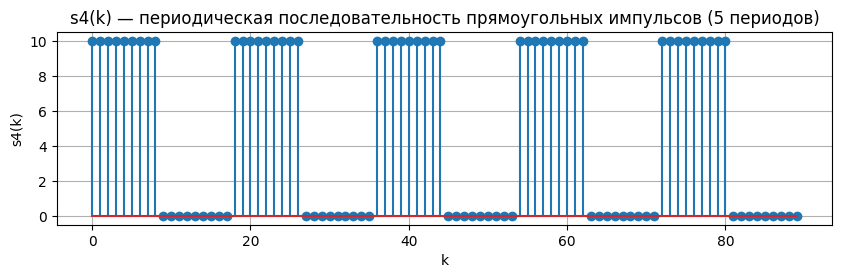

In [6]:
period = 2 * n_imp        # период в 2 раза больше длительности импульса
total = 5 * period        # строим 5 периодов
k = np.arange(total)
s4 = U * (k % period < n_imp)
# Используем остаток от деления, чтобы "повторять" импульс через каждые period отсчетов
# k % period < n_imp — True (1) для первых n_imp отсчетов каждого периода

plt.figure(figsize=(10,2.5))
plt.stem(k, s4, )
plt.title('s4(k) — периодическая последовательность прямоугольных импульсов (5 периодов)')
plt.xlabel('k'); plt.ylabel('s4(k)')
plt.grid(True)
plt.show()

**График:** Будет показано пять периодов последовательности, где каждый период длиной T = 2·n_imp содержит:
- Импульс амплитудой U длительностью n_imp отсчётов
- Паузу (нулевое значение) длительностью n_imp отсчётов

**Операции при моделировании:**
1. Создаётся один период последовательности длиной T = 2·n_imp:
   - Первые n_imp отсчётов равны U
   - Следующие n_imp отсчётов равны 0
2. Этот период повторяется 5 раз для получения пяти периодов
3. Альтернативно можно использовать операцию взятия остатка от деления: s₄(k) = U при (k mod T) < n_imp, иначе 0

**Аналитически для одного периода:**
$$
s_4^{\text{период}}(k) = 
\begin{cases}
U, & 0 \leq k < n_{\text{imp}} \\
0, & n_{\text{imp}} \leq k < 2n_{\text{imp}}
\end{cases}
$$

## Выводы
1. **Дискретный прямоугольный импульс** может быть эффективно смоделирован через разность двух задержанных единичных скачков, что позволяет легко управлять его положением и длительностью.

2. **Линейная комбинация гармонических сигналов** демонстрирует принцип суперпозиции: сложный сигнал можно представить как сумму простых гармонических составляющих. Вычисленные характеристики (среднее значение, энергия, мощность) позволяют количественно оценить свойства результирующего сигнала.

3. **Гармонический сигнал с экспоненциальной огибающей** представляет важный класс сигналов, встречающихся в реальных физических системах (затухающие колебания, резонансные процессы). Параметр |a| определяет характер изменения амплитуды во времени.

4. **Периодическая последовательность импульсов** с периодом, вдвое большим длительности импульса (скважность 2), является типичным примером меандра. Такие последовательности широко используются в цифровой технике и системах передачи данных.

5. **Общий вывод:** Методы моделирования дискретных сигналов, представленные в работе, являются фундаментальными для цифровой обработки сигналов. Они позволяют создавать как простые, так и сложные сигналы, анализировать их свойства и визуализировать результаты, что составляет основу для дальнейшего изучения дискретных систем и преобразований сигналов
